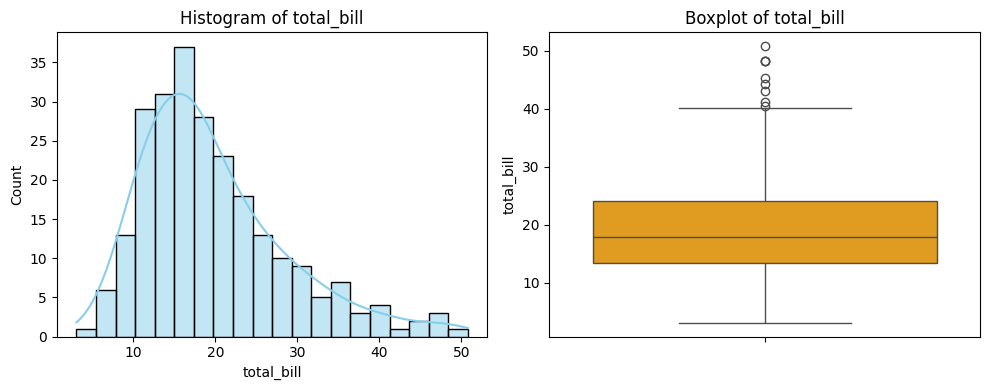

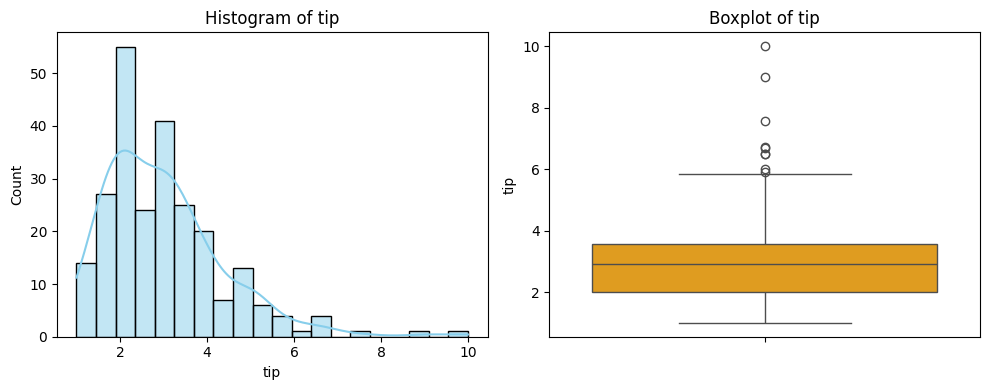

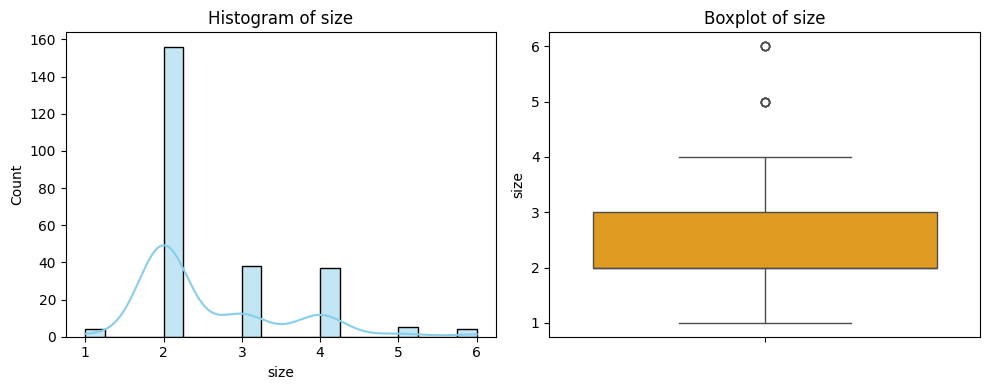

/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1466584240.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col


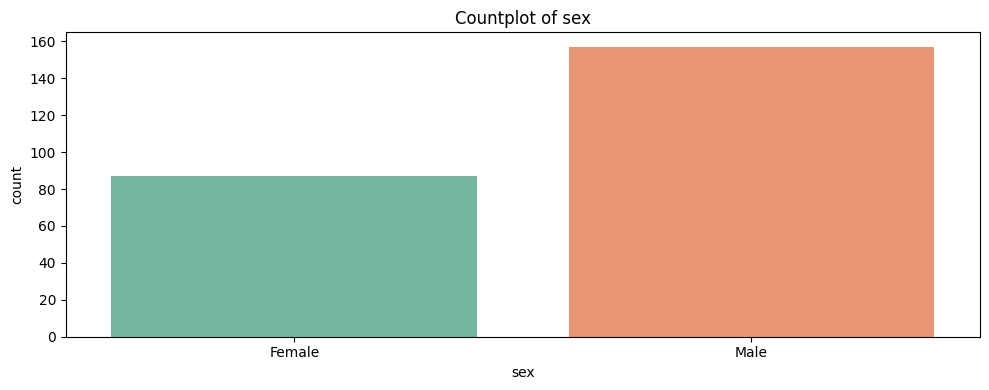

/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1466584240.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col


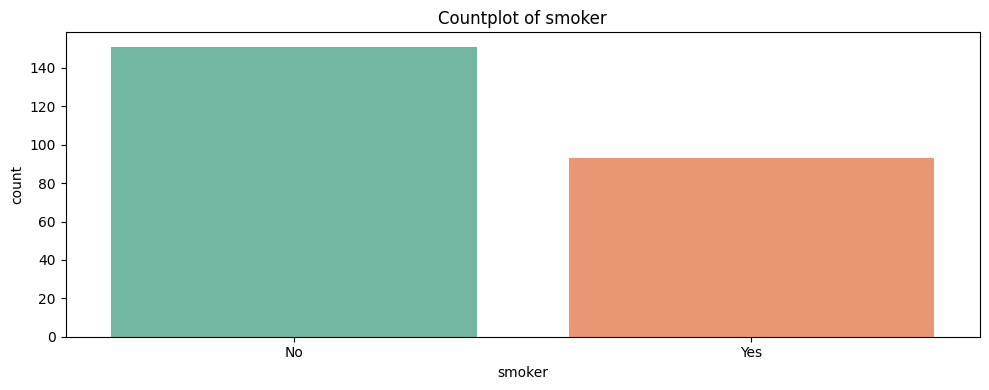

In [2]:
# Basic Statistics for Tips Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tips.csv")   # make sure tips.csv is in the same folder

# Select 5 important columns
important_cols = [
   "total_bill",
   "tip",
   "size",
   "sex",
   "smoker"
]

# ---- Function to calculate statistics ----
def column_statistics(series):
    stats = {}
    if pd.api.types.is_numeric_dtype(series):
        stats[
   "mean"
] = series.mean()
        stats[
   "median"
] = series.median()
        stats[
   "mode"
] = series.mode()[
   0
]
        stats[
   "min"
] = series.min()
        stats[
   "max"
] = series.max()
        stats[
   "std"
] = series.std()
    else:
        stats[
   "mode"
] = series.mode()[
   0
]
    return stats

# ---- Compute statistics for each column ----
all_stats = {}
for col in important_cols:
    all_stats[col
] = column_statistics(df[col
])

# Display stats
pd.DataFrame(all_stats)

# ---- Graphical Representation for each column ----

for col in important_cols:
    plt.figure(figsize=(10,
4))
    if pd.api.types.is_numeric_dtype(df[col
]):
        # Histogram
        plt.subplot(1,
2,
1)
        sns.histplot(df[col
], kde=True, bins=20, color="skyblue")
        plt.title(f"Histogram of {col}")
        
        # Boxplot
        plt.subplot(1,
2,
2)
        sns.boxplot(y=df[col
], color="orange")
        plt.title(f"Boxplot of {col}")
        
    else:
        # Categorical columns → Countplot
        sns.countplot(x=df[col
], palette="Set2")
        plt.title(f"Countplot of {col}")
    
    plt.tight_layout()
    plt.show()



Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


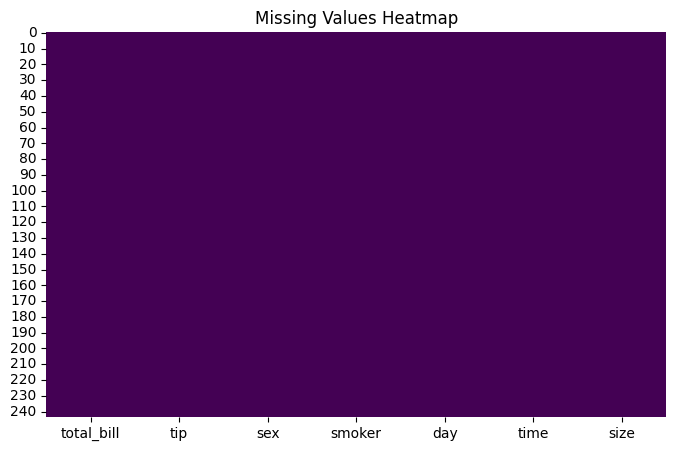

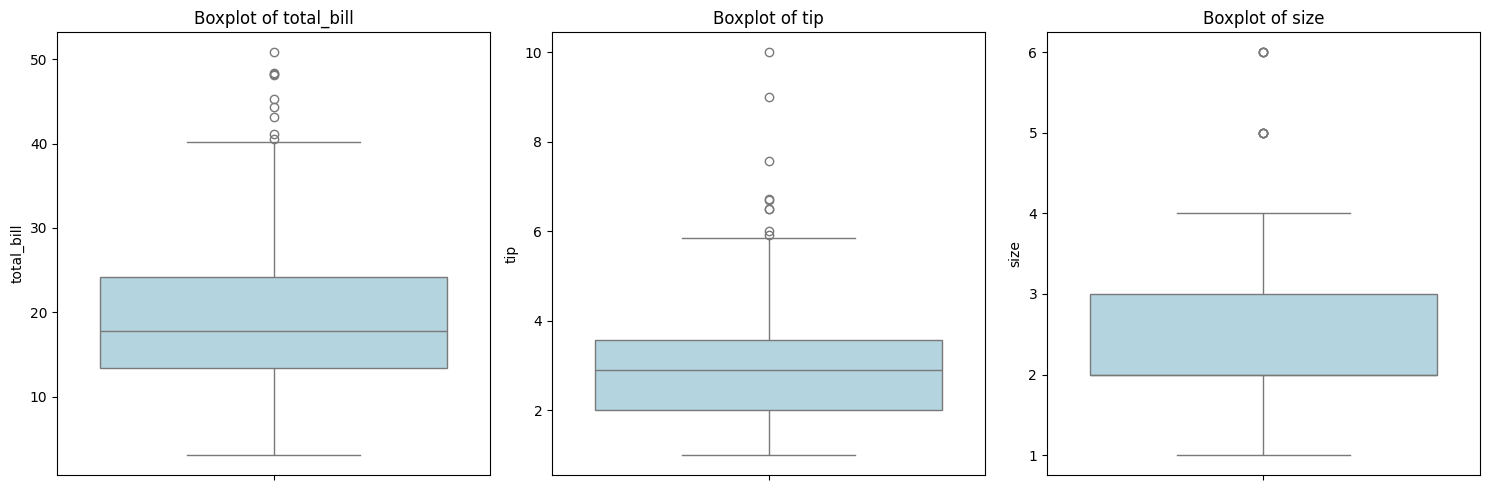

{'total_bill': 59     48.27
 102    44.30
 142    41.19
 156    48.17
 170    50.81
 182    45.35
 184    40.55
 197    43.11
 212    48.33
 Name: total_bill, dtype: float64,
 'tip': 23      7.58
 47      6.00
 59      6.73
 141     6.70
 170    10.00
 183     6.50
 212     9.00
 214     6.50
 239     5.92
 Name: tip, dtype: float64,
 'size': 125    6
 141    6
 142    5
 143    6
 155    5
 156    6
 185    5
 187    5
 216    5
 Name: size, dtype: int64}

In [3]:
# Missing Values & Outlier Detection in Tips Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tips.csv")   # Ensure tips.csv is in the same folder
df.head()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Visualize missing values (heatmap)
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Plot boxplots for numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# IQR method to detect outliers
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Apply for all numeric columns
outliers = {}
for col in numeric_cols:
    outliers[col] = find_outliers_iqr(df[col])

outliers




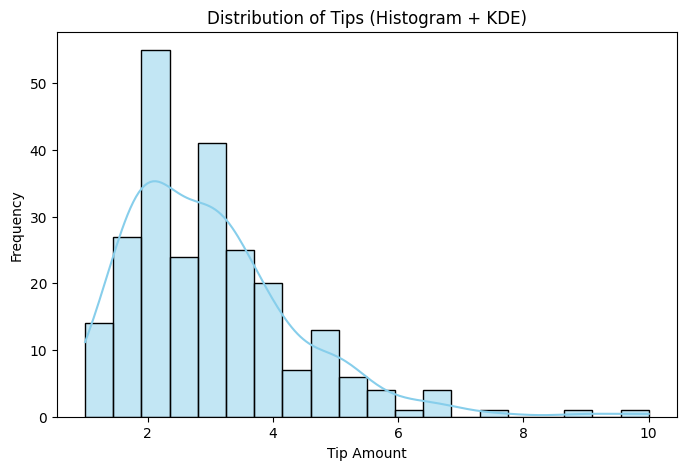

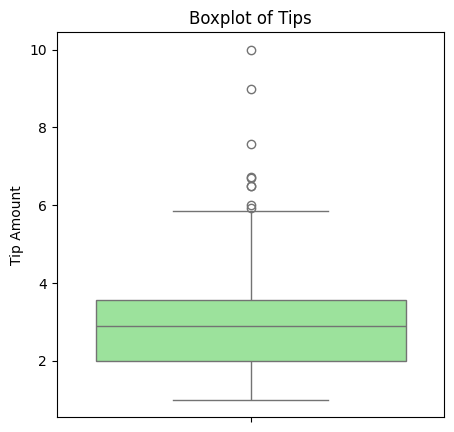

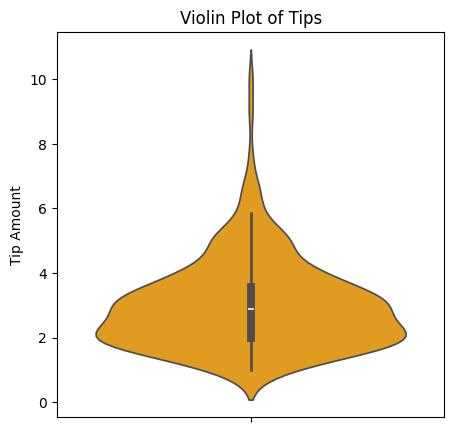

Univariate Analysis Insights for 'tip':
- The mean tip is around 3.00
- The median tip is 2.90
- The most frequent tip (mode) is 2.00
- The minimum tip recorded is 1.00, while the maximum is 10.00
- The standard deviation indicates variability of 1.38


In [5]:
# Univariate Analysis of 'tip' column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tips.csv")   # Ensure tips.csv is in the same folder
df.head()

# Basic statistics
tip_stats = {
    "Mean": df["tip"].mean(),
    "Median": df["tip"].median(),
    "Mode": df["tip"].mode()[0],
    "Min": df["tip"].min(),
    "Max": df["tip"].max(),
    "Standard Deviation": df["tip"].std()
}
tip_stats


plt.figure(figsize=(8,5))
sns.histplot(df["tip"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Tips (Histogram + KDE)")
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(5,5))
sns.boxplot(y=df["tip"], color="lightgreen")
plt.title("Boxplot of Tips")
plt.ylabel("Tip Amount")
plt.show()


plt.figure(figsize=(5,5))
sns.violinplot(y=df["tip"], color="orange")
plt.title("Violin Plot of Tips")
plt.ylabel("Tip Amount")
plt.show()


print("Univariate Analysis Insights for 'tip':")
print("- The mean tip is around {:.2f}".format(df["tip"].mean()))
print("- The median tip is {:.2f}".format(df["tip"].median()))
print("- The most frequent tip (mode) is {:.2f}".format(df["tip"].mode()[0]))
print("- The minimum tip recorded is {:.2f}, while the maximum is {:.2f}".format(df["tip"].min(), df["tip"].max()))
print("- The standard deviation indicates variability of {:.2f}".format(df["tip"].std()))


/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1286220193.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="tip", data=df, palette="pastel")


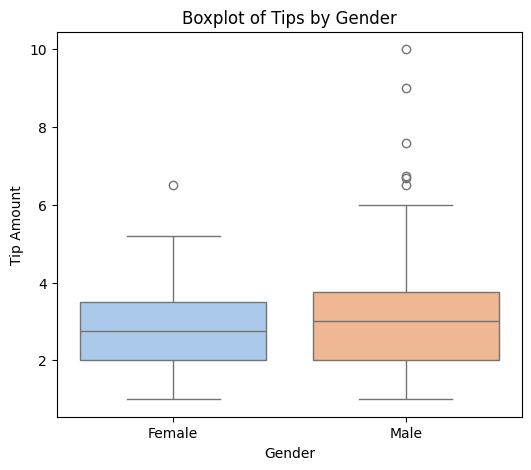

/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1286220193.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="sex", y="tip", data=df, palette="muted")


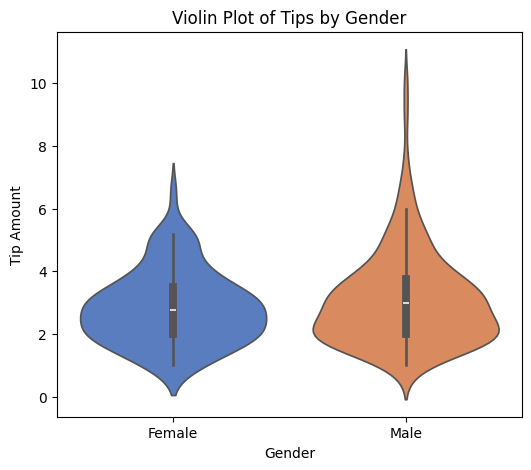

/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1286220193.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="sex", y="tip", data=df, estimator="mean", ci="sd", palette="Set2")
/var/folders/lg/r2yqs7j54cl35qs864wfmkkr0000gp/T/ipykernel_64658/1286220193.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="tip", data=df, estimator="mean", ci="sd", palette="Set2")


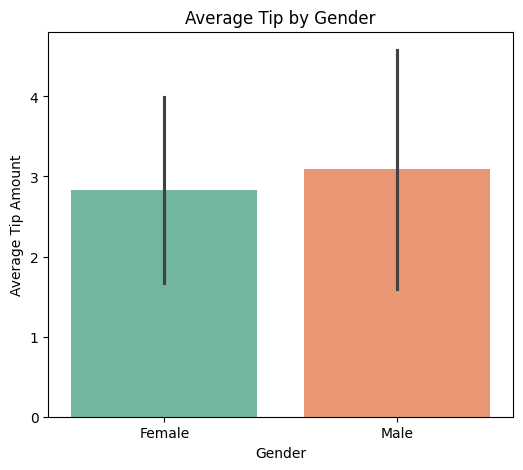

Bivariate Analysis Insights (Tips vs Gender):
- Males and Females may have different tipping behaviors.
- Check mean values from the grouped statistics to see who tips more on average.
- Boxplot & violin plots show spread and skewness of tip distribution.
- Barplot highlights the average tip difference clearly.


In [4]:
# Bivariate Analysis of Tips vs Gender

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tips.csv")   # Ensure tips.csv is in the same folder
df.head()

# Group by gender and compute basic stats
gender_stats = df.groupby("sex")["tip"].agg(["count", "mean", "median", "std", "min", "max"])
gender_stats

plt.figure(figsize=(6,5))
sns.boxplot(x="sex", y="tip", data=df, palette="pastel")
plt.title("Boxplot of Tips by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.show()

plt.figure(figsize=(6,5))
sns.violinplot(x="sex", y="tip", data=df, palette="muted")
plt.title("Violin Plot of Tips by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.show()

plt.figure(figsize=(6,5))
sns.barplot(x="sex", y="tip", data=df, estimator="mean", ci="sd", palette="Set2")
plt.title("Average Tip by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Tip Amount")
plt.show()

print("Bivariate Analysis Insights (Tips vs Gender):")
print("- Males and Females may have different tipping behaviors.")
print("- Check mean values from the grouped statistics to see who tips more on average.")
print("- Boxplot & violin plots show spread and skewness of tip distribution.")
print("- Barplot highlights the average tip difference clearly.")

